In [ ]:
# Import files from the Replicaton GitHub

  # README of PR2017Replicaton:
! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/README.md
  
  # Main Analysis Template R Markdown:

! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/analysis_template.Rmd

  # Datasets:

! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/rawPharmacoData.csv
! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/summarizedPharmacoData.csv

  # Tutorials:

! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/R_basics.Rmd
! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/exploration.Rmd
! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/pharmaco_correlation.Rmd
! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/targeted_therapies.Rmd
! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/regression.Rmd

  # Code to generate data files (not used)

# ! wget https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/downloadData.R

--2020-10-21 03:06:38--  https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/README.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3494 (3.4K) [text/plain]
Saving to: ‘README.md’

README.md           100%[===================>]   3.41K  --.-KB/s    in 0s      

2020-10-21 03:06:38 (50.4 MB/s) - ‘README.md’ saved [3494/3494]

--2020-10-21 03:06:39--  https://raw.githubusercontent.com/areyesq89/PR2017replicaton/master/analysis_template.Rmd
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8239 (8.0K) [text/plain]
Saving to: ‘

In [ ]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
x <- 42
print(x)

NameError: ignored

In [ ]:
%%R
x <- 42
print(x)

[1] 42


## Tutorial 1: exploration.Rmd

In [ ]:
hello


NameError: ignored

## Tutorial 2: pharmaco_correlation.Rmd

##Tutorial 3: targeted_therapies.Rmd

In [6]:
%%R

knitr::opts_chunk$set(echo = TRUE)

UsageError: Cell magic `%%R` not found.


In [2]:
%%R

cellLinesSummary <- read.csv("summarizedPharmacoData.csv", header=TRUE)
str(cellLinesSummary)

UsageError: Cell magic `%%R` not found.


In [5]:
%%R

library(ggplot2)
AUC_study1 <- rbeta(200, 1, 5)
AUC_study2 <- rbeta(200, 1, 5)
resistant <- data.frame(AUC_study1, AUC_study2)
ggplot(resistant, aes( y=AUC_study2, x=AUC_study1) ) +
    geom_point() + ggtitle("Simulated AUC of resistant cell lines") +
    xlim(0,1) + ylim(0,1)

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R

cor(AUC_study1, AUC_study2)

In [ ]:
%%R 

AUC_study1 <- c(rbeta(100, 1, 5), rbeta(100, 4, 2))
AUC_study2 <- c(rbeta(100, 1, 5), rbeta(100, 4, 2))
resistant <- data.frame(AUC_study1, AUC_study2, 
                        CellLine=c(rep("Resistant", 100), rep("Sensitive", 100)))
ggplot(resistant, aes( y=AUC_study2, x=AUC_study1, colour=CellLine) ) +
    geom_point() + ggtitle("Simulated AUC with half sensitive and half resistant cell lines") +
    xlim(0,1) + ylim(0,1)

In [ ]:
%%R

cor(AUC_study1, AUC_study2)

In [ ]:
%%R

library(tidyr)
library(plyr)
library(dplyr)

drugAvg <- cellLinesSummary %>% 
              group_by(cellLine) %>%
              summarise(mean_ic50_CCLE = mean(-log10(ic50_CCLE/10^6)), 
                        mean_ic50_GDSC = mean(-log10(ic50_GDSC/10^6)),
                        mean_auc_CCLE = mean(auc_CCLE),
                        mean_auc_GDSC = mean(auc_GDSC))
              
ggplot(drugAvg, aes(x=mean_ic50_GDSC, y=mean_ic50_CCLE)) +
    geom_point(alpha=0.6) +
    ggtitle("Average IC50 value by cell line (averaged over drugs)")

In [ ]:
%%R

cellLinesSummary <- cellLinesSummary %>% 
              mutate(cutoff = ifelse(drug=="paclitaxel", 0.4, 0.1)) %>%
              mutate(sensitivity_GDSC = factor(ifelse( auc_GDSC < cutoff, "Resistant", "Sensitive")), 
                     sensitivity_CCLE = factor(ifelse( auc_CCLE < cutoff, "Resistant", "Sensitive"))) 
              
table("GDSC"=cellLinesSummary$sensitivity_GDSC, "CCLE"=cellLinesSummary$sensitivity_CCLE)

In [ ]:
%%R 

cellLinesSummary <- cellLinesSummary %>% 
              mutate(category = paste(sensitivity_GDSC, sensitivity_CCLE)) %>%
              mutate(category = revalue(category, c("Resistant Resistant" = "Both Resistant",
                                                    "Sensitive Sensitive" = "Both Sensitive",
                                                    "Resistant Sensitive" = "GDSC Resistant / CCLE Sensitive",
                                                    "Sensitive Resistant" = "GDSC Sensitive / CCLE Resistant")))
              
table(cellLinesSummary$category)

ggplot(aes(x=auc_GDSC, y=auc_CCLE, colour=category), data=subset(cellLinesSummary, drug=="PLX4720")) +
    geom_point() + 
    xlab("GDSC AUC") +
    ylab("CCLE AUC") +
    geom_hline(aes(yintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    geom_vline(aes(xintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    ggtitle("Drug PLX4720")

In [ ]:
%%R

ggplot(aes(x=auc_GDSC, y=auc_CCLE, colour=category), data=cellLinesSummary) +
    geom_point(cex=0.5) + 
    facet_wrap(facets=~drug) +
    xlab("GDSC AUC") +
    ylab("CCLE AUC") +
    geom_hline(aes(yintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    geom_vline(aes(xintercept=cutoff), colour="grey", alpha=0.75, lty=2) 

In [ ]:
%%R 

mcc <- function (study1, study2)
{
  BS <- sum(study1 == "Sensitive" & study2 == "Sensitive") 
  BR <- sum(study1 == "Resistant" & study2 == "Resistant") 
  SR <- sum(study1 == "Sensitive" & study2 == "Resistant") 
  RS <- sum(study1 == "Resistant" & study2 == "Sensitive") 
  
  if (BS+SR == 0 | BS+RS == 0 | BR+SR == 0 |  BR+RS ==0){
    mcc <- ((BS*BR)-(SR*RS)) 
  }else{
    mcc <- ((BS*BR)-(SR*RS)) / sqrt(exp((log(BS+SR)+log(BS+RS)+log(BR+SR)+log(BR+RS))))
  }
  return(mcc)
}
drugCorrs <- cellLinesSummary %>% 
  group_by(drug) %>% 
  summarise(matthews_corr=mcc(sensitivity_GDSC, sensitivity_CCLE))

In [ ]:
%%R 

drugCorrs

In [ ]:
%%R 

ggplot(data=drugCorrs, aes(x=drug, y=matthews_corr)) +
  geom_bar(stat="identity") + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Drug")+
  ylab("Matthews Correlation Coefficient")

## Tutorial 4: regression.Rmd

In [4]:
%%R

knitr::opts_chunk$set(cache=FALSE, warning=FALSE)

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R

devtools::install_url("https://github.com/wilkelab/cowplot/archive/0.6.3.zip")

In [ ]:
%%R

rawFile <- "rawPharmacoData.csv"
summarizedFile <- "summarizedPharmacoData.csv"
if(!file.exists(rawFile)){
    source("downloadData.R")
}
pharmacoData <- read.csv(rawFile)
summarizedData <- read.csv(summarizedFile)

In [ ]:
%%R

plotResponse <- function(drugA, cellLineA, addPublishedIC50=TRUE ) {
  pharSub <- filter( pharmacoData, drug==drugA, cellLine==cellLineA )
  sumSub <- filter( summarizedData, drug==drugA, cellLine==cellLineA )
  p <- ggplot( pharSub, aes( log10(concentration), viability, col=study)) +
      geom_point(size=2.1) + geom_line(lwd=1.1) + ylim(0, 150)
  if( addPublishedIC50 ){
      p <- p + geom_vline( sumSub, xintercept=log10( sumSub[,"ic50_CCLE"] ), col="#d95f02", linetype="longdash") +
          geom_vline( xintercept=log10( sumSub[,"ic50_GDSC"]), col="#1b9e77", linetype="longdash") +
          geom_hline( yintercept=50, col="#00000050", linetype="longdash")
  }
  p <- p + scale_colour_manual( values = c("CCLE" = "#d95f02", "GDSC" = "#1b9e77" ))
  xlims <- xlim( range(log10(c(pharSub$concentration, sumSub$ic50_CCLE, sumSub$ic50_GDSC ) ) ) )
  p + xlims
}

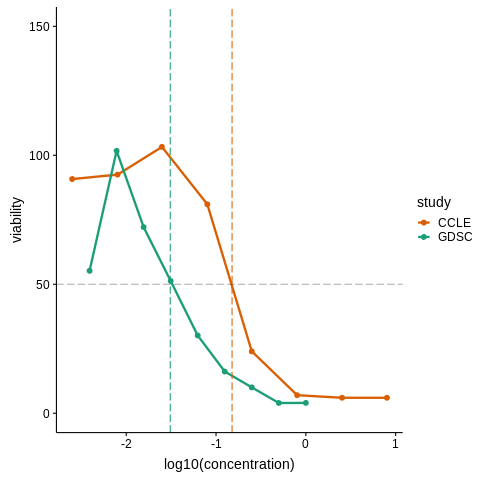

In [ ]:
%%R

plotResponse( drugA="17-AAG", cellLineA="H4", TRUE )

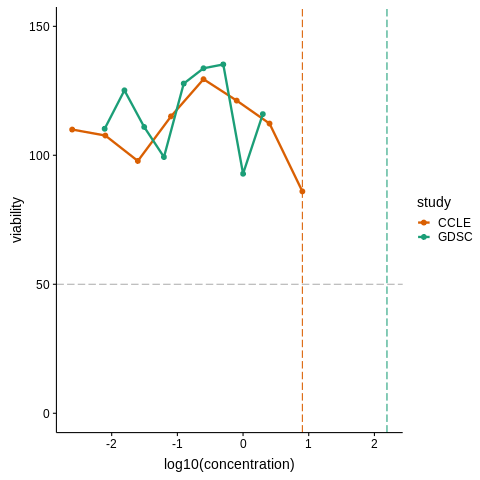

In [ ]:
%%R

plotResponse( drugA="Nilotinib", cellLineA="22RV1" )

In [ ]:
%%R

fitLogisticModel <- function(drugA, cellLineA, studyA){
    pharSub <- filter( pharmacoData, drug==drugA, cellLine==cellLineA, study==studyA)
    inRange <- pharSub$viability > 0 & pharSub$viability < 100
    pharSub$viability <- round(pharSub$viability)
    pharSub$concentration <- log10( pharSub$concentration )
    maxVal <- pmax( pharSub$viability, 100 )
    fit <- glm( cbind( viability, maxVal-viability ) ~ concentration,
               pharSub, family=binomial )
    fit
}

In [ ]:
%%R

lrCCLE1 <- fitLogisticModel( "17-AAG", "H4", "CCLE" )
lrGDSC1 <- fitLogisticModel( "17-AAG", "H4", "GDSC" )

lrCCLE2 <- fitLogisticModel( "Nilotinib", "22RV1", "CCLE" )
lrGDSC2 <- fitLogisticModel( "Nilotinib", "22RV1", "GDSC" )

lrCCLE1


Call:  glm(formula = cbind(viability, maxVal - viability) ~ concentration, 
    family = binomial, data = pharSub)

Coefficients:
  (Intercept)  concentration  
       -1.880         -2.317  

Degrees of Freedom: 7 Total (i.e. Null);  6 Residual
Null Deviance:	    647.6 
Residual Deviance: 83.29 	AIC: 115.4


In [ ]:
%%R

lrCCLE2


Call:  glm(formula = cbind(viability, maxVal - viability) ~ concentration, 
    family = binomial, data = pharSub)

Coefficients:
  (Intercept)  concentration  
        4.142         -2.104  

Degrees of Freedom: 7 Total (i.e. Null);  6 Residual
Null Deviance:	    59.92 
Residual Deviance: 25.39 	AIC: 36.32


In [ ]:
%%R

predictValues <- function( fit, numPred=1000){
    min <- min( fit$data$concentration )
    max <- max( fit$data$concentration )
    valuesToPredict <- seq(min, max, length.out=numPred)
    predicted <- predict( fit,
            data.frame(concentration=valuesToPredict),
            type="response" )
    data.frame( concentration=valuesToPredict,
               viability=predicted*100 )
}

plotFit <- function(p, fitCCLE, fitGDSC ){
    p <- p + geom_line( aes( concentration, viability ),
              data=predictValues( fitCCLE ), lwd=1.2,
              linetype="dashed", col="#d95f02" )+
    geom_line( aes( concentration, viability ),
              data=predictValues( fitGDSC ), lwd=1.2,
              linetype="dashed", col="#1b9e77")
    p
}


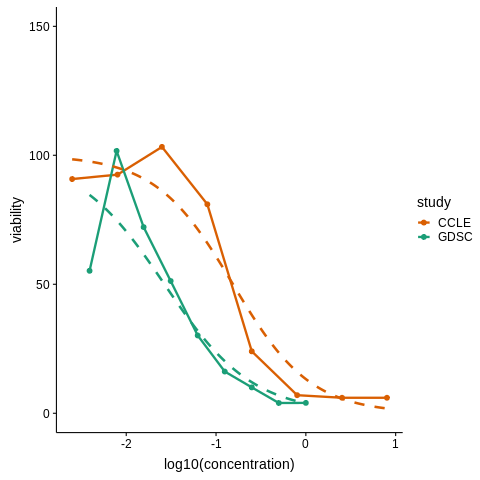

In [ ]:
%%R

plotFit( plotResponse( "17-AAG", "H4", FALSE ),
        fitCCLE=lrCCLE1, fitGDSC=lrGDSC1 )

R[write to console]: Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



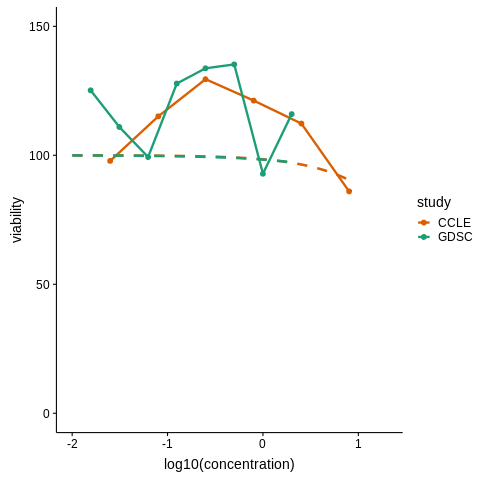

In [ ]:
%%R


plotFit( plotResponse( "Nilotinib", "22RV1", FALSE ),
        fitCCLE=lrCCLE2, fitGDSC=lrGDSC2 ) +
        xlim(-2, 1.3)

In [ ]:
%%R

library(magrittr)

getIC50Value <- function( fit ){
    if( !fit$converged ){
      return( NA )
    }
    predictValues( fit, numPred=10000 ) %>% 
    { .$concentration[which.min( abs( .$viability - 50) )] }
}

10^getIC50Value( lrCCLE1 )
10^getIC50Value( lrGDSC1 )
filter( summarizedData, drug=="17-AAG", cellLine=="H4")[,c("ic50_CCLE", "ic50_GDSC")]

10^getIC50Value( lrCCLE2 )
10^getIC50Value( lrGDSC2 )
filter( summarizedData, drug=="Nilotinib", cellLine=="22RV1")[,c("ic50_CCLE", "ic50_GDSC")]

  ic50_CCLE ic50_GDSC
1         8  155.2699


In [ ]:
%%R

getAUCValue <- function( fit ){
    numbOfPredictions <- 10000
    if( !fit$converged ){
      return( NA )
    }
    x <- 1 - ( predictValues( fit, numPred=numbOfPredictions )$viability / 100 ) ## difference between 1 and the predicted viability probability
    x <- sum( x ) ## summing all the predicted values
    x / numbOfPredictions ## normalize such that the total area sums to 1
}

getAUCValue( lrCCLE1 )
getAUCValue( lrGDSC1 )
filter( summarizedData, drug=="17-AAG", cellLine=="H4")

getAUCValue( lrCCLE2 )
getAUCValue( lrGDSC2 )
filter( summarizedData, drug=="Nilotinib", cellLine=="22RV1")


  cellLine      drug ic50_CCLE auc_CCLE ic50_GDSC auc_GDSC
1    22RV1 Nilotinib         8        0  155.2699 0.003935


In [ ]:
%%R

mySummarizedData <- suppressWarnings( lapply( seq_len( nrow( summarizedData )), function(x){
  drug <- as.character( summarizedData$drug[x] )
  cellLine <- as.character( summarizedData$cellLine[x] )
  fitCCLE <- try( fitLogisticModel( drug, cellLine, "CCLE" ), silent=TRUE)
  fitGDSC <- try( fitLogisticModel( drug, cellLine, "GDSC" ), silent=TRUE)
  if( inherits(fitCCLE, "try-error") ){
    ic50CCLE <- NA
    aucCCLE <- NA
  }else{
    ic50CCLE <- 10^getIC50Value( fitCCLE )
    aucCCLE <- getAUCValue( fitCCLE )
  }
  if( inherits(fitGDSC, "try-error") ){
    ic50GDSC <- NA
    aucGDSC <- NA
  }else{
    ic50GDSC <- 10^getIC50Value( fitGDSC )
    aucGDSC <- getAUCValue( fitGDSC )
  }
  data.frame( drug=drug, 
     cellLine=cellLine, 
     ic50_CCLE=ic50CCLE, 
     auc_CCLE=aucCCLE,
     ic50_GDSC=ic50GDSC,
     auc_GDSC=aucGDSC )
} ) )

mySummarizedData <- do.call( rbind, mySummarizedData )

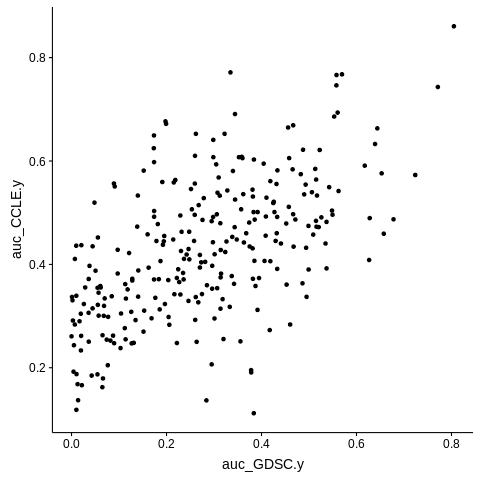

In [ ]:
%%R

allSummarizedData <- merge( x=summarizedData, y=mySummarizedData, by=c("drug", "cellLine"))

ggplot( 
  filter( allSummarizedData, drug=="17-AAG"), aes( -log10(ic50_GDSC.y), -log10( ic50_CCLE.y) ) ) +
  geom_point()

ggplot( 
  filter( allSummarizedData, drug=="17-AAG"), aes( auc_GDSC.y, auc_CCLE.y ) ) +
  geom_point()

In [ ]:
%%R

fitLinearModel <- function(drugA, cellLineA, studyA){
    pharSub <- filter( pharmacoData, drug==drugA, cellLine==cellLineA, study==studyA)
    pharSub$concentration <- log10( pharSub$concentration )
    fit <- lm( viability~ concentration, pharSub )
    fit
}

In [ ]:
%%R

linearModelCCLE1 <- fitLinearModel( "17-AAG", "H4", "CCLE" )
slope1 <- coefficients( linearModelCCLE1 )["concentration"]
linearModelGDSC1 <- fitLinearModel( "17-AAG", "H4", "GDSC" )
slope2 <- coefficients( linearModelGDSC1 )["concentration"]

linearModelCCLE2 <- fitLinearModel( "Nilotinib", "22RV1", "CCLE" )
coefficients( linearModelCCLE2 )["concentration"]


concentration 
    -1.430474 


In [ ]:
%%R

linearModelGDSC2 <- fitLinearModel( "Nilotinib", "22RV1", "GDSC" )
coefficients( linearModelGDSC2 )["concentration"]

concentration 
    0.4806636 
